In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
  
import warnings 
warnings.filterwarnings('ignore') 
  
from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
  
import os 
import matplotlib.image as mpimg

import glob
import re
import shutil

/Users/shivanggulati/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# define and move to dataset directory
datasetdir = 'datapath/to/dogs_vs_cats'
import os
os.chdir(datasetdir)

# import the needed packages
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras

# shortcut to the ImageDataGenerator class
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

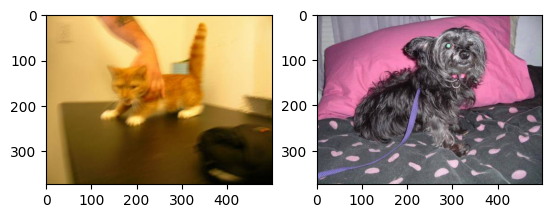

In [3]:
plt.subplot(1,2,1) #(row, col, index positn in grid)
plt.imshow(img.imread('cats/cat.0.jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('dogs/dog.0.jpg'))

In [4]:
images = []
for i in range(10):
  im = img.imread('cats/cat.{}.jpg'.format(i))
  images.append(im)
  print('image shape', im.shape, 'maximum color level', im.max())

#heaight and width are first two cols and third is colour channels
#range of colour is 255 at max

image shape (374, 500, 3) maximum color level 255
image shape (280, 300, 3) maximum color level 248
image shape (396, 312, 3) maximum color level 255
image shape (414, 500, 3) maximum color level 255
image shape (375, 499, 3) maximum color level 255
image shape (144, 175, 3) maximum color level 255
image shape (303, 400, 3) maximum color level 255
image shape (499, 495, 3) maximum color level 255
image shape (345, 461, 3) maximum color level 255
image shape (425, 320, 3) maximum color level 247


In [5]:
#manually getting bad images indices
#was labelled with the data downloading in description itself
bad_dog_ids = [5604, 6413, 8736, 8898, 9188, 9517, 10161, 
               10190, 10237, 10401, 10797, 11186]

bad_cat_ids = [2939, 3216, 4688, 4833, 5418, 6215, 7377, 
               8456, 8470, 11565, 12272]

In [6]:
def load_images(ids, categ):
#it rtns imgs corrsponding to the list of their ids as per name saved
  
  images = []
  dirname = categ+'s' # dog -> dogs
  for theid in ids: 
    fname = '{dirname}/{categ}.{theid}.jpg'.format(
        dirname=dirname,
        categ=categ, 
        theid=theid
    )
    im = img.imread(fname)
    images.append(im)
  return images

In [7]:
bad_dogs = load_images(bad_dog_ids, 'dog')
bad_cats = load_images(bad_cat_ids, 'cat')

In [8]:
def plot_images(images, ids):
    ncols, nrows = 4, 3
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
    for i, (img, theid) in enumerate(zip(images,ids)):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(img)
      plt.title(str(theid))
      plt.axis('off')

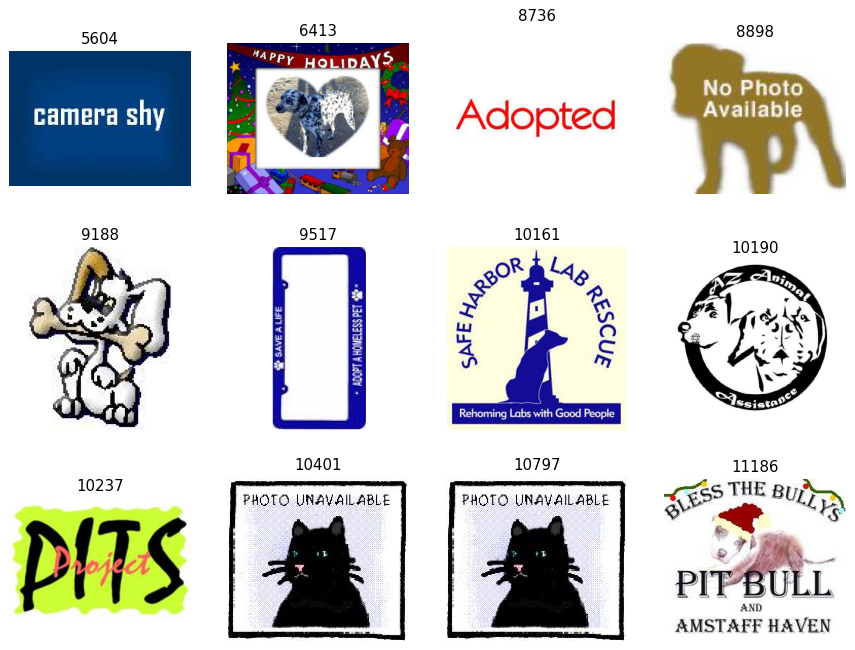

In [9]:
plot_images(bad_dogs, bad_dog_ids)

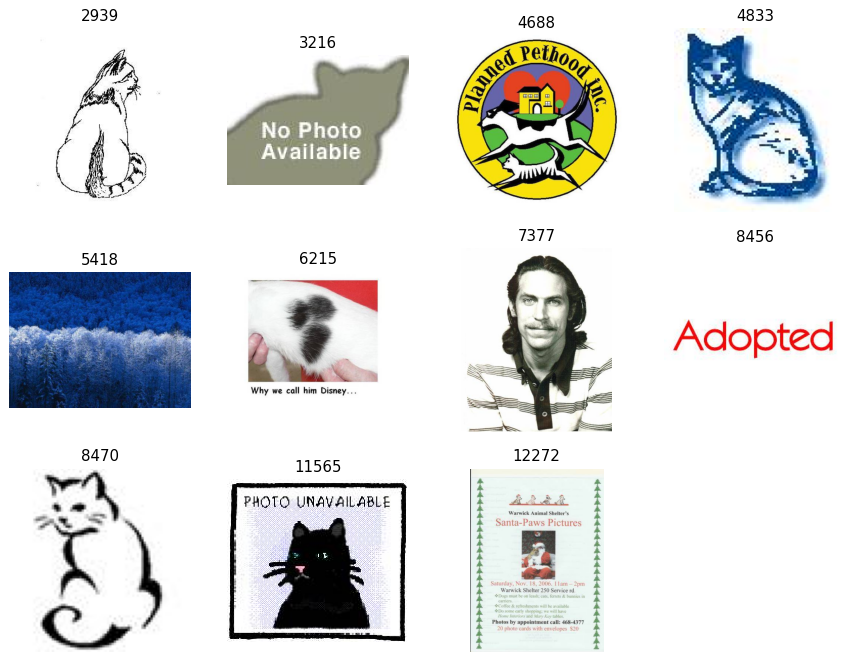

In [10]:
plot_images(bad_cats, bad_cat_ids)

In [11]:
#this will help cleanup the dataset as well as matches any string with the substring <abc.digits.jpg>

pattern = re.compile(r'.*\.(\d+)\..*')

def trash_path(dirname):
    #rtns path of trash directory where dog and cat imgs will be stored.
    return os.path.join('../Trash', dirname)

def cleanup(ids, dirname): 
  #move away images with these ids in dirname
  os.chdir(datasetdir)

  oldpwd = os.getcwd()

  os.chdir(dirname)

  '''goes thru all files in dir (dirname). matches file name with the defined pattern to extract id
  if the id is in the listed dir to be trashed, files rmvd to trash dir'''

  trash = trash_path(dirname)
  if os.path.isdir(trash):
    shutil.rmtree(trash)
  os.makedirs(trash, exist_ok=True)
  # loop on all cat or dog files
  fnames = os.listdir()
  for fname in fnames:
    m = pattern.match(fname)
    if m: 

      # extract the id
      the_id = int(m.group(1))
      if the_id in ids:

        # this id is in the list of ids to be trashed
        print('moving to {}: {}'.format(trash, fname))
        shutil.move(fname, trash)

  # going back to root directory
  os.chdir(oldpwd)

def restore(dirname):
  # restore the images back to their dirtry if you want to train with the bad imgs, just in case
  os.chdir(datasetdir)
  oldpwd = os.getcwd()
  os.chdir(dirname)
  trash = trash_path(dirname)
  print(trash)
  for fname in os.listdir(trash):
    fname = os.path.join(trash,fname)
    print('restoring', fname)
    print(os.getcwd())
    shutil.move(fname, os.getcwd())
  os.chdir(oldpwd)
 

In [12]:
cleanup(bad_cat_ids,'cats')

moving to ../Trash/cats: cat.3216.jpg
moving to ../Trash/cats: cat.2939.jpg
moving to ../Trash/cats: cat.8456.jpg
moving to ../Trash/cats: cat.11565.jpg
moving to ../Trash/cats: cat.7377.jpg
moving to ../Trash/cats: cat.8470.jpg
moving to ../Trash/cats: cat.5418.jpg
moving to ../Trash/cats: cat.12272.jpg
moving to ../Trash/cats: cat.4688.jpg
moving to ../Trash/cats: cat.4833.jpg
moving to ../Trash/cats: cat.6215.jpg


In [13]:
cleanup(bad_dog_ids, 'dogs')

moving to ../Trash/dogs: dog.10237.jpg
moving to ../Trash/dogs: dog.6413.jpg
moving to ../Trash/dogs: dog.10190.jpg
moving to ../Trash/dogs: dog.10797.jpg
moving to ../Trash/dogs: dog.8898.jpg
moving to ../Trash/dogs: dog.8736.jpg
moving to ../Trash/dogs: dog.11186.jpg
moving to ../Trash/dogs: dog.5604.jpg
moving to ../Trash/dogs: dog.9188.jpg
moving to ../Trash/dogs: dog.9517.jpg
moving to ../Trash/dogs: dog.10161.jpg
moving to ../Trash/dogs: dog.10401.jpg


In [15]:
gen = ImageDataGenerator()

#it helps to transform data for training like flipping, zooming, rotating, etc.

In [16]:
iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('dogs','cats')
)

batch = iterator.next()
len(batch)

print("\n")
print(type(batch[0]))
print(type(batch[1]))

#resize the imgs from both subdir to 256x256 and save it = done by -> flow_from_directory 

Found 25000 images belonging to 2 classes.


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
print(batch[0].shape) #(batch size, height image, width image, 3 channels in image - RGB)
print(batch[0].dtype) #return data type
print(batch[0].max()) #max val at idx 0, range of pixel val basically
print(batch[1].shape) #rtns shape of array at idx crspndg to label
print(batch[1].dtype)

(32, 256, 256, 3)
float32
255.0
(32, 2)
float32


In [18]:
def plot_images(batch):
    imgs = batch[0]
    labels = batch[1]
    ncols, nrows = 4,8 #number of columns and rows for the subplot grid.
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90) #make new matplt figure with a specific size and dots per inch (dpi)
    for i, (img,label) in enumerate(zip(imgs,labels)): #iterates through all images using enum
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(img.astype(np.int)) #cnvrt img to int before plotting
      assert(label[0]+label[1]==1.) #check to ensure that the labels represent prob or 1-hot encoded values
      categ = 'dog' if label[0]>0.5 else 'cat' #det dog or cat based on label values
      plt.title( '{} {}'.format(str(label), categ))
      plt.axis('off')

#visualizing a batch of images along with their corresponding labels

In [19]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., #feature scaling, mul image pxl val of img by 1/255. purps is to ensure val b/w 0 and 1
    validation_split = 0.2,
)


In [20]:
batch_size = 10 #no of training examples used in an iter
height, width = (256,256)

train_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

val_dataset = imgdatagen.flow_from_directory(
    os.getcwd(),
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [21]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), #add convulational layer with 5x5 kernel size and 24 filters
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) ) #adds max pooling layer of size 2x2 to reduce spatial dim of i/p
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', #another 48 layers added
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', #anthr 96 layers
    )
)
model.add( keras.layers.Flatten() ) #flatten the layer to 1d array
model.add( keras.layers.Dropout(0.9) ) #90% neurons will be randomly dropped at the end to prevent o/f

model.add( keras.layers.Dense(
    2, activation='softmax', #softmax is used for multi-class classification.
    ) #here, we add dense layer with 2 units using the sftmx functn
)

model.summary()

#layers are
'''Convolutional Layers: 3
Pooling Layers: 2
Flatten Layers: 1
Dropout Layers: 1 #prevent overfitting by excluding individual nodes
Dense (Output) Layers: 1'''

2023-12-26 23:09:50.334613: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-26 23:09:50.334668: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-26 23:09:50.334683: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-26 23:09:50.335226: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-26 23:09:50.335669: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 24)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 48)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten (Flatten)           (None, 311904)            0

'Convolutional Layers: 3\nPooling Layers: 2\nFlatten Layers: 1\nDropout Layers: 1 #prevent overfitting by excluding individual nodes\nDense (Output) Layers: 1'

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(lr=0.001), #adamax is extnsn of Adam Optimizer used for training nn
              metrics=['acc']) #specify the metrics to monitor, here accuracy

In [27]:
history = model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=5,
)

Epoch 1/5
2000/2000 [==============================] - 146s 73ms/step - loss: 0.3447 - acc: 0.8517 - val_loss: 0.3926 - val_acc: 0.8390
Epoch 2/5
2000/2000 [==============================] - 145s 72ms/step - loss: 0.3133 - acc: 0.8681 - val_loss: 0.4293 - val_acc: 0.8052
Epoch 3/5
2000/2000 [==============================] - 146s 73ms/step - loss: 0.2881 - acc: 0.8795 - val_loss: 0.3679 - val_acc: 0.8390
Epoch 4/5
2000/2000 [==============================] - 145s 73ms/step - loss: 0.2656 - acc: 0.8913 - val_loss: 0.4093 - val_acc: 0.8098
Epoch 5/5
2000/2000 [==============================] - 145s 72ms/step - loss: 0.2433 - acc: 0.9000 - val_loss: 0.3278 - val_acc: 0.8588


Training accuracy:
89.99500274658203

Testing accuracy:
85.87999939918518


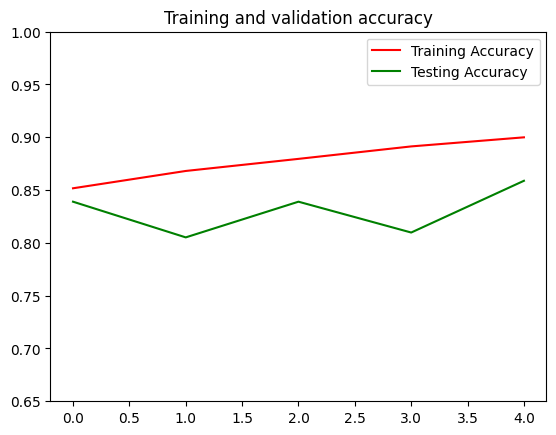

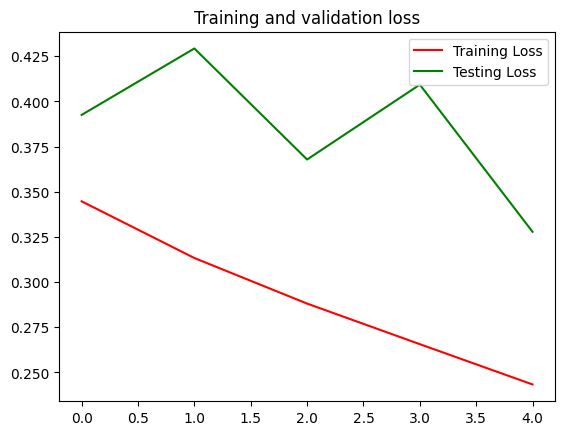

In [28]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc)) #det number of ep from training history of the model


    plt.plot(epochs, acc, color='red')
    plt.plot(epochs, val_acc, color='green')
    plt.legend(["Training Accuracy", "Testing Accuracy"], loc ="upper right")
    plt.title('Training and validation accuracy')
    plt.ylim(yrange) #plot training and validatn acc as per epoch
    
    plt.figure()

    plt.plot(epochs, loss, color='red')
    plt.plot(epochs, val_loss, color='green')
    plt.title('Training and validation loss')
    plt.legend(["Training Loss", "Testing Loss"], loc ="upper right")
    #same but plot loss this time
    
    print("Training accuracy:")
    print(100*acc[4])
    print("\nTesting accuracy:")
    print(100*val_acc[4])
    plt.show()

plot_history(history, (0.65, 1.)) #pass lower and upper bound of y axis
#done to be specific and plot within a range for better visualisation
#parameters multiplied are weights and ones added are biases

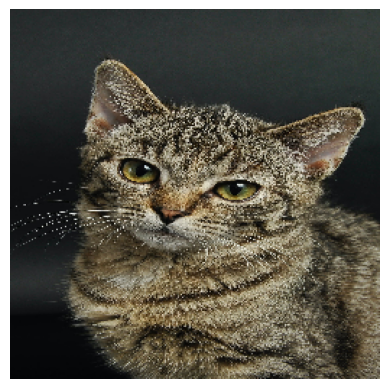

1/1 [==============================] - 0s 12ms/step
Predicted class label: cat
Class probabilities: [[1.8846664e-07 9.9999976e-01]]


In [30]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load a sample image
sample_image_path = "datapath/to/testcat.jpg"
img = image.load_img(sample_image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Display the sample image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make predictions
predictions = model.predict(img_array)

# Post-process predictions
class_labels = ['dog', 'cat']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class label:", predicted_class_label)
print("Class probabilities:", predictions)